For this notebook, I wanted to classify different credit card transactions and being fraud or not. You'll notice that the feature's aren't named; this is because they're hidden to protect to privacy of the individuals represented in the dataset.

In [68]:
import sys
sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils.data_utils import split_dataset
from models import GaussianNaiveBayesClassifer

In [69]:
# load data
filename = 'datasets/creditcard.csv'
df = pd.read_csv(filename)

In [70]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
# descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [72]:
# extract list of features
features = df.columns[:-1]
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [73]:
# extract features (X) and target values (y)
X = df[features].values
y = df.Class.values

Text(0.5, 1.0, 'Pearson Correlation Coefficients for Credit Fraud Dataset Features')

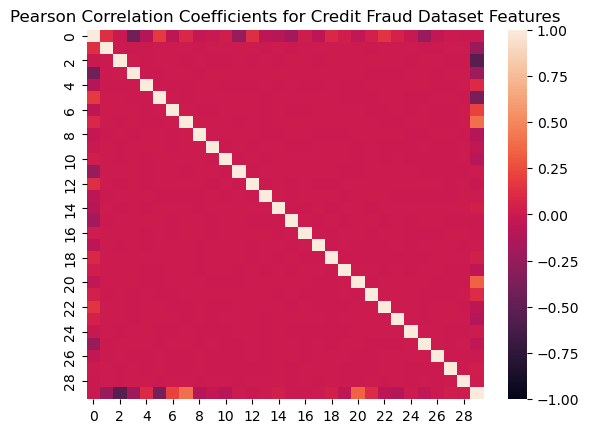

In [85]:
# visual check for multicolinearity
sns.heatmap(np.corrcoef(X.T), vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficients for Credit Fraud Dataset Features')

We can observe low multicollinearity between our features, which is nice in our case since gaussian naive bayes assumes feature independence. It doesn't necessarily mean the model would be a more accurate classifier, though, just that you could potentially use it as a regressor (actually predicting the probability of a sample being positive or negative). 

In [74]:
# dataset is highly unbalanced
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [75]:
# split dataset into train and test sets
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

In [76]:
# fit model to training data, then evaluate on test data
model = GaussianNaiveBayesClassifer()
model.fit(X_train, y_train)

accuracy = model.accuracy(X_test, y_test)
precision = model.precision(X_test, y_test)
recall = model.recall(X_test, y_test)
f1_score = model.f1_score(X_test, y_test)

print(f'''Test accuracy: {accuracy}
Test precision: {precision}
Test recall: {recall}
Test f1_score: {f1_score}''')

Test accuracy: 0.9734208770759454
Test precision: 0.05415617128463476
Test recall: 0.8775510204081632
Test f1_score: 0.10201660735468565


We can observe that though the accuracy is high, precision is low. We can interpret precision as the percentage of the time the model is correct given that it predicts that a sample is positive. In other words, it answers the question: "If the model predicts that a transaction is fraud, what is the probability that it is correct?"

This is likely due to the extreme class imbalance (284315 positive vs 492 negative samples).

# Downsampling Training Set

To curb the problem of low precision, I'll try downsampling the training set. This will involve selecting a random subset of the negative samples, which results in a 20 % representation of positive samples in the trainin data. However, for the test data, I'll apply no change as we want to see how our model actually performs in the real world.

In [77]:
# figure out total downsampled training dataset size
desired_percent_positive_samples = 0.2
num_positive_samples = y_train.sum()

total_augmented_dataset_size = num_positive_samples / desired_percent_positive_samples

total_augmented_dataset_size

np.float64(1970.0)

In [78]:
# total samples will be positive + negative samples
desired_number_negative_samples = total_augmented_dataset_size - num_positive_samples

desired_number_negative_samples

np.float64(1576.0)

In [79]:
# separate positive and negative samples from training data
positive_mask = y_train == 1
negative_mask = ~positive_mask

X_train_positive = X_train[positive_mask]
X_train_negative = X_train[negative_mask]

X_train_positive.shape, X_train_negative.shape

((394, 30), (227451, 30))

In [80]:
# randomly select appropriate number of negative samples
X_train_negative_idxs = np.arange(X_train_negative.shape[0])

X_train_negative_idxs_downsampled = np.random.choice(X_train_negative_idxs, \
                                                size=(desired_number_negative_samples.astype(int), ),
                                                replace=False)

X_train_negative_downsampled = X_train_negative[X_train_negative_idxs_downsampled]

assert X_train_negative_downsampled.shape[0] == desired_number_negative_samples, 'downsampling failed'

X_train_negative_downsampled.shape

(1576, 30)

In [81]:
# join the downsampled negative samples with the unaltered positive training samples to arrive
# at final downsampled dataset
X_train_downsampled = np.concat([X_train_positive, X_train_negative_downsampled], axis=0)

assert X_train_downsampled.shape[0] == desired_number_negative_samples + num_positive_samples

X_train_downsampled.shape

(1970, 30)

In [82]:
# also have to fix target values for training data
y_train_downsampled = np.array([1 if i < num_positive_samples else 0 for i in range(X_train_downsampled.shape[0])])

assert y_train_downsampled.mean() == desired_percent_positive_samples
assert X_train_downsampled.shape[0] == y_train_downsampled.shape[0]

y_train_downsampled.shape

(1970,)

In [83]:
# fit model to downsampled training data, then evaluate on regular test data
model = GaussianNaiveBayesClassifer()
model.fit(X_train_downsampled, y_train_downsampled)

accuracy = model.accuracy(X_test, y_test)
precision = model.precision(X_test, y_test)
recall = model.recall(X_test, y_test)
f1_score = model.f1_score(X_test, y_test)

print(f'''Test accuracy: {accuracy}
Test precision: {precision}
Test recall: {recall}
Test f1_score: {f1_score}''')

Test accuracy: 0.9605175380077947
Test precision: 0.03702109341368919
Test recall: 0.8775510204081632
Test f1_score: 0.07104502271788517


Huh, that didn't help much. Oh well, it was worth a shot...